In [1]:
import os 
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("bond_dim_behav.json", 'r') as jf:
    bond_dict = json.load(jf)
with open("bond_dim_eval.json", 'r') as jf:
    bond_eval = json.load(jf)
with open("map_spher_times.json", 'r') as jf:
    sper_dict = json.load(jf)
with open("map_poli_times.json", 'r') as jf:
    poli_dict = json.load(jf)
with open("pure_model_history.json", 'r') as jf:
    pure_dict = json.load(jf)
with open("opti_model_history.json", 'r') as jf:
    opti_dict = json.load(jf)
with open("bond_dim_behav_eval.json", 'r') as jf:
    bond_eval_mean = json.load(jf)
with open("map_sph_perf.json", 'r') as jf:
    sph_perf = json.load(jf)
with open("map_pol_perf.json", 'r') as jf:
    pol_perf = json.load(jf)
with open("batch_size_times.json", 'r') as jf:
    batch_dict = json.load(jf)

In [3]:
#print bond dim
for k in bond_dict.keys():
    print(k[2:], bond_dict[k]['params'])

5 2730
10 16005
15 50330
20 116205
25 224130
30 384605
35 608130
40 905205
45 1286330
50 1762005
55 2342730
60 3039005
65 3861330
70 4820205
75 5926130
80 7189605
85 8621130
90 10231205
95 12030330
100 14029005


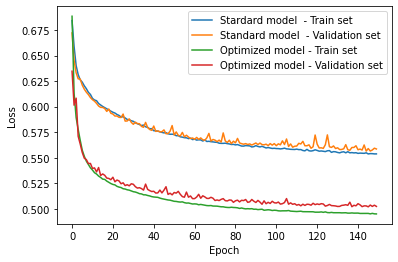

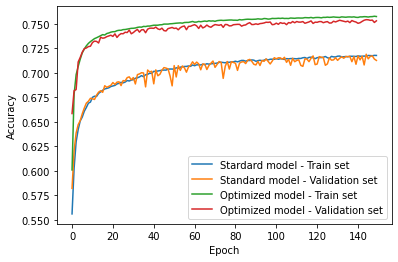

In [4]:
#plot pure model vs optimized

plt.plot(pure_dict['loss']    , label="Stardard model  - Train set"      )
plt.plot(pure_dict['val_loss'], label="Standard model  - Validation set" )
plt.plot(opti_dict['loss']    , label="Optimized model - Train set"     )
plt.plot(opti_dict['val_loss'], label="Optimized model - Validation set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("plots/model_loss_compare.pdf",bbox_inches='tight')
plt.show()

plt.plot(pure_dict['accuracy']    , label="Stardard model - Train set"      )
plt.plot(pure_dict['val_accuracy'], label="Standard model - Validation set" )
plt.plot(opti_dict['accuracy']    , label="Optimized model - Train set"     )
plt.plot(opti_dict['val_accuracy'], label="Optimized model - Validation set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("plots/model_acc_compare.pdf",bbox_inches='tight')
plt.show()



In [5]:
bd   = []
los  = []
acc  = []
auc  = []
for k in bond_eval.keys():
    bd.append(int(k[3:]))
    los.append(bond_eval[k][0])
    acc.append(bond_eval[k][1])
    auc.append(bond_eval[k][2])
    
bd  = np.array(bd )    
los = np.array(los)
acc = np.array(acc)    
auc = np.array(auc)

sort = np.argsort(bd)
bd  = bd  [sort]
los = los [sort]
acc = acc [sort]
auc = auc [sort]

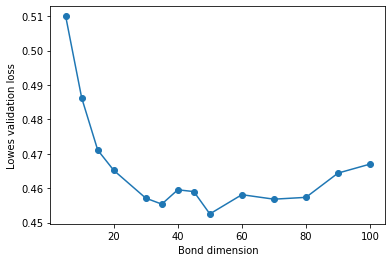

In [6]:
plt.plot(bd, los, 'o-')
plt.xlabel("Bond dimension")
plt.ylabel("Lowes validation loss")
plt.savefig("plots/Bond_dim_lowst_loss.pdf", bbox_inches='tight')
plt.show()

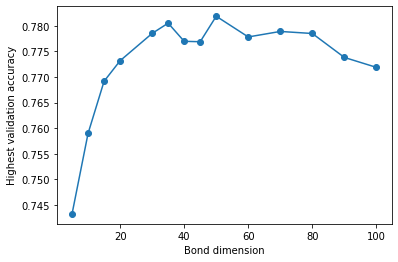

In [7]:
plt.plot(bd, acc, 'o-')
plt.xlabel("Bond dimension")
plt.ylabel("Highest validation accuracy")
plt.savefig("plots/Bond_dim_val_acc.pdf", bbox_inches='tight')
plt.show()

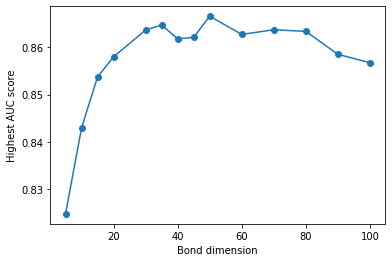

In [8]:
plt.plot(bd, auc, 'o-')
plt.xlabel("Bond dimension")
plt.ylabel("Highest AUC score")
plt.savefig("plots/Bond_dim_val_auc.pdf", bbox_inches='tight')
plt.show()

In [9]:
bd    = []
tmean = []
tstd  = []
teval = []
tsig  = []
for k in bond_dict.keys():
    bd.append(int(k[2:]))
    tmean.append(bond_dict[k]['mean_train_time'])
    tstd .append(bond_dict[k]['std_train_time'])
    teval.append(bond_dict[k]['eval_time'])
    #teval.append(bond_eval_mean[k]['mean_eval_time'])
    #tsig.append(bond_eval_mean[k]['std_eval_time'])
    
bd    = np.array(bd )    
tmean = np.array(tmean)
tstd  = np.array(tstd )    
teval = np.array(teval)

sort  = np.argsort(bd)
bd    = bd  [sort]
tmean = tmean [sort]
tstd  = tstd  [sort]
teval = teval [sort]

In [10]:
from scipy.optimize import curve_fit

def func(x, a, b ,c):
    return a*x**b +c

popt, pcov = curve_fit(func, bd, tmean)
popt

array([2.31763329e-04, 2.76090372e+00, 6.21786065e+00])

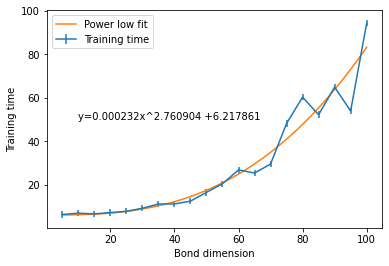

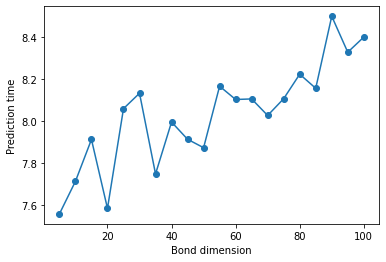

In [11]:
x = np.linspace(np.min(bd), np.max(bd), 1000)
plt.errorbar(bd, tmean, tstd, label= 'Training time')
plt.plot(x, func(x, *popt), label="Power low fit")
plt.text(10, 50, "y=%2fx^%f +%f " % (popt[0], popt[1], popt[2]))
plt.xlabel("Bond dimension")
plt.ylabel("Training time")
plt.legend()
plt.savefig("plots/Bond_dim_train_time.pdf", bbox_inches='tight')
plt.show()

plt.plot(bd, teval, 'o-')
plt.xlabel("Bond dimension")
plt.ylabel("Prediction time")
plt.savefig("plots/Bond_dim_eval_time.pdf", bbox_inches='tight')
plt.show()

In [12]:
bd    = []
sph_mean = []
sph_std  = []
sph_eval = []
pol_mean = []
pol_std  = []
pol_eval = []
for k in sper_dict.keys():
    bd.append(int(k[6:]))
    sph_mean .append(sper_dict[k]['mean_train_time'])
    sph_std  .append(sper_dict[k]['std_train_time'])
    sph_eval .append(sper_dict[k]['eval_time'])
    pol_mean .append(poli_dict[k]['mean_train_time'])
    pol_std  .append(poli_dict[k]['std_train_time'])
    pol_eval .append(poli_dict[k]['eval_time'])
    
bd    = np.array(bd )    
sph_mean = np.array(sph_mean)
sph_std  = np.array(sph_std )    
sph_eval = np.array(sph_eval)
pol_mean = np.array(pol_mean)
pol_std  = np.array(pol_std )
pol_eval = np.array(pol_eval)

sort  = np.argsort(bd)
bd    = bd  [sort]
sph_mean = sph_mean[sort]
sph_std  = sph_std [sort]
sph_eval = sph_eval[sort]
pol_mean = pol_mean[sort]
pol_std  = pol_std [sort]
pol_eval = pol_eval[sort]




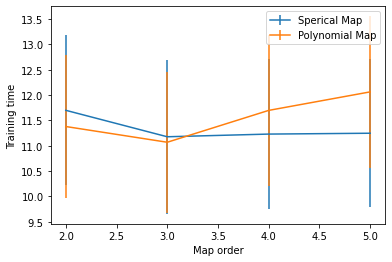

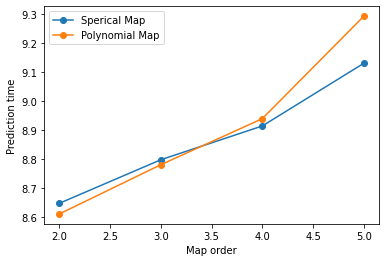

In [13]:
plt.errorbar(bd, sph_mean, sph_std, label="Sperical Map")
plt.errorbar(bd, pol_mean, pol_std, label="Polynomial Map")
plt.xlabel("Map order")
plt.ylabel("Training time")
plt.legend()
plt.savefig("plots/map_train_time.pdf", bbox_inches='tight')
plt.show()

plt.plot(bd, sph_eval, 'o-', label="Sperical Map")
plt.plot(bd, pol_eval, 'o-', label="Polynomial Map")
plt.xlabel("Map order")
plt.ylabel("Prediction time")
plt.legend()
plt.savefig("plots/map_eval_time.pdf", bbox_inches='tight')
plt.show()

In [14]:
bd    = []
sph_los = []
sph_acc = []
sph_auc = []
pol_los = []
pol_acc = []
pol_auc = []
for k in sph_perf.keys():
    bd.append(int(k[5:]))
    sph_los .append(sph_perf[k][0])
    sph_acc .append(sph_perf[k][1])
    sph_auc .append(sph_perf[k][2])
    pol_los .append(pol_perf[k][0])
    pol_acc .append(pol_perf[k][1])
    pol_auc .append(pol_perf[k][2])
    
bd    = np.array(bd )    
sph_los = np.array(sph_los)
sph_acc = np.array(sph_acc)    
sph_auc = np.array(sph_auc)
pol_los = np.array(pol_los)
pol_acc = np.array(pol_acc)
pol_auc = np.array(pol_auc)

sort  = np.argsort(bd)
bd    = bd  [sort]
sph_los = sph_los[sort]
sph_acc = sph_acc[sort]
sph_auc = sph_auc[sort]
pol_los = pol_los[sort]
pol_acc = pol_acc[sort]
pol_auc = pol_auc[sort]


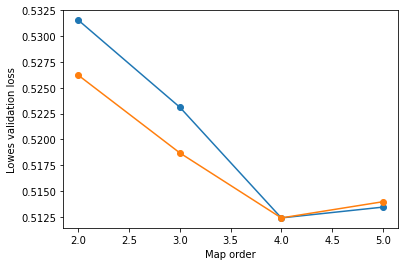

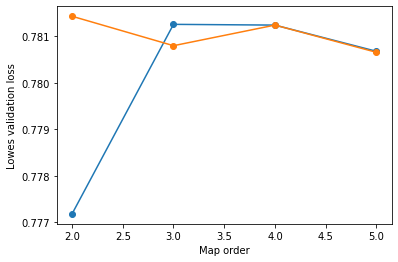

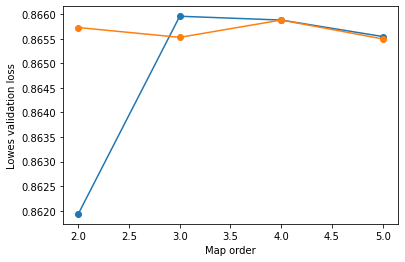

In [16]:
plt.plot(bd, sph_los, 'o-', label="Spherical map")
plt.plot(bd, pol_los, 'o-', label="Polynomial map")
plt.xlabel("Map order")
plt.ylabel("Lowes validation loss")
plt.savefig("plots/Map_lowst_loss.pdf", bbox_inches='tight')
plt.show()

plt.plot(bd, sph_acc, 'o-', label="Spherical map")
plt.plot(bd, pol_acc, 'o-', label="Polynomial map")
plt.xlabel("Map order")
plt.ylabel("Lowes validation loss")
plt.savefig("plots/Map_acc_perf.pdf", bbox_inches='tight')
plt.show()

plt.plot(bd, sph_auc, 'o-', label="Spherical map")
plt.plot(bd, pol_auc, 'o-', label="Polynomial map")
plt.xlabel("Map order")
plt.ylabel("Lowes validation loss")
plt.savefig("plots/Map_auc_perf.pdf", bbox_inches='tight')
plt.show()


In [19]:
bs      = []
t_mean  = []
t_std   = []

for k in batch_dict.keys():
    bs.append(int(k[3:]))
    t_mean.append(batch_dict[k]["mean_train_time"])
    t_std .append(batch_dict[k]["std_train_time"])
    
bs    = np.array(bs )    
t_mean = np.array(t_mean)
t_std  = np.array(t_std )    

sort  = np.argsort(bs)
bs    = bs  [sort]
t_mean = t_mean[sort]
t_std  = t_std [sort]

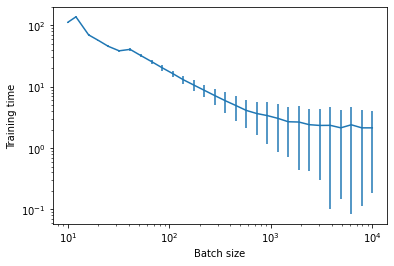

In [21]:
plt.errorbar(bs, t_mean, t_std)
plt.xlabel("Batch size")
plt.ylabel("Training time")
plt.yscale('log')
plt.xscale('log')
plt.savefig("plots/Batch_size_train_time.pdf", bbox_inches='tight')
plt.show()